In [1]:
import pandas as pd
import os

In [2]:
import tensorflow as tf

In [ ]:
pip install tensorflow

In [3]:
import tensorflow as tf

#전체 scene 개수 입력
scene_num = int(input())

 4


In [4]:
#particle 최대 개수 입력
particle_num = int(input())

 171


In [5]:
scene = range(scene_num)
li = []

#전체 데이터 불러오기
for i in scene:
    i = i+1
    a = '%d'%i
    for j in range(particle_num):
        path = 'D://splash/Generator_Splashes/save/scene'+a+'/scene'+a+'_particle%d.txt'%j
        if os.path.isfile(path): 
            data = pd.read_csv(path, header = None)
            data = data[1:]
            li.append(data)
    

print(li)

[                                                     0
1    -0.116451 -0.117433 -0.116451 57.674558 47.854...
2    -0.118953 -0.119935 -0.096782 32.659584 22.839...
3    -0.119055 -0.120037 -0.067899 31.630883 21.810...
4    -0.119055 -0.120037 -0.040739 31.630875 21.810...
5    -0.119055 -0.120037 -0.013580 31.630877 21.810...
..                                                 ...
725  0.091896 0.090914 -0.013580 -31.630872 -41.450...
726  0.091896 0.090914 0.013580 -31.630874 -41.4508...
727  0.091896 0.090914 0.040740 -31.630872 -41.4508...
728  0.091793 0.090811 0.069622 -32.659568 -42.4795...
729  0.089291 0.088309 0.089291 -57.674550 -67.4945...

[729 rows x 1 columns],                                                      0
1    -0.112330 -0.115276 -0.112330 -16.466601 -26.2...
2    -0.116634 -0.119580 -0.096879 -9.472995 -19.29...
3    -0.114890 -0.117836 -0.067246 10.027017 0.2070...
4    -0.115255 -0.118201 -0.040927 6.375050 -3.4449...
5    -0.115271 -0.118217 -0.013580 6.21

In [6]:
#전체 데이터 합치기
frame = pd.concat(li)
frame[0] = frame[0].astype(str)
frame_split = frame[0].str.split(" ")

In [7]:
frame['px'] = frame_split.str.get(0)
frame['py'] = frame_split.str.get(1)
frame['pz'] = frame_split.str.get(2)
frame['ax'] = frame_split.str.get(3)
frame['ay'] = frame_split.str.get(4)
frame['az'] = frame_split.str.get(5)
frame['density'] = frame_split.str.get(6)
frame['pressure'] = frame_split.str.get(7)
frame['viscosity'] = frame_split.str.get(8)
frame['splash'] = frame_split.str.get(9)

In [8]:
df = frame.drop([0],axis=1)
df = df.astype({'px' :'float','py' :'float', 'pz' :'float','ax' :'float','ay' :'float','az' :'float',
               'density' :'float', 'pressure' :'float', 'viscosity' :'float', 'splash' : 'int'})
df = df.reset_index(drop=True)
df

,px,py,pz,ax,ay,az,density,pressure,viscosity,splash
0,-0.116451,-0.117433,-0.116451,57.674558,47.854558,57.674558,619.722997,61618.270903,0.000000,0
1,-0.118953,-0.119935,-0.096782,32.659584,22.839584,-17.227661,725.175409,35585.529169,0.000000,0
2,-0.119055,-0.120037,-0.067899,31.630883,21.810883,0.000005,725.175465,32262.336988,0.000000,0
3,-0.119055,-0.120037,-0.040739,31.630875,21.810875,-0.000008,725.175507,32262.330516,0.000000,0
4,-0.119055,-0.120037,-0.013580,31.630877,21.810877,0.000004,725.175493,32262.332328,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
451966,0.125042,-0.097321,0.016149,0.046836,0.908579,0.073652,1049.244997,11257.009283,109.225525,0
451967,0.150000,-0.122612,0.043608,12.906491,0.004751,0.095754,1181.939832,19342.041987,392.625020,0
451968,0.150000,-0.097434,0.086260,3.646577,0.721666,0.029166,1021.174687,11635.068089,187.791400,0
451969,0.150000,-0.123037,0.106506,12.500731,0.262435,0.094519,1173.541837,18558.914221,350.122943,0


In [9]:
#splash 데이터 확인하기
df[df['splash']==1]

,px,py,pz,ax,ay,az,density,pressure,viscosity,splash
2250,-0.119042,0.054461,-0.119042,5.422739,-4.646053,5.422739,953.823543,2996.229314,5645.425103,1
2251,-0.125723,0.055243,-0.092223,5.083562,-2.945182,-6.874818,957.736015,5361.661777,6855.977337,1
2257,-0.125723,0.055243,0.065063,5.083557,-2.945188,6.874812,957.736043,5361.657172,6855.976941,1
2258,-0.119042,0.054461,0.091882,5.422730,-4.646058,-5.422731,953.823586,2996.218443,5645.423522,1
2269,-0.092223,-0.135543,-0.092223,-6.874823,-4.736434,-6.874823,957.735987,5361.666382,6855.977732,1
...,...,...,...,...,...,...,...,...,...,...
387308,0.131299,-0.086311,0.073124,4.275368,1.478177,0.414738,946.495863,8523.400157,6641.566037,1
387314,0.097192,-0.091463,0.092664,4.146409,0.125007,-1.002657,912.534373,3179.191151,6856.517993,1
387666,0.140255,-0.086055,0.108701,-0.923751,-2.877837,1.131982,925.875511,3390.124331,3394.931799,1
387893,0.094735,-0.097936,0.091218,7.859822,11.487309,-3.651943,988.729824,14212.421708,8792.013899,1


In [10]:
#splash와 non-splash 수 맞추기
splash_random = df[df['splash']==1].sample(10800, random_state=123).index.tolist()
nonsplash_random = df[df['splash']==0].sample(10800, random_state=456).index.tolist()
random_idx = splash_random + nonsplash_random

In [11]:
dfs = df.iloc[random_idx]
dfs

,px,py,pz,ax,ay,az,density,pressure,viscosity,splash
127967,-0.113053,-0.096457,-0.104991,-6.932188,0.059582,11.834151,926.467030,9095.646681,10546.794563,1
36567,-0.126390,-0.088163,-0.105510,7.260273,0.779568,-0.864334,992.589724,7402.704115,6331.892782,1
110581,0.085837,-0.041006,0.010733,-2.452962,-7.698919,-3.077639,983.036511,6752.364504,3368.818132,1
239307,-0.045411,-0.032902,0.020142,4.525186,-9.118767,-1.510638,946.726897,3923.985322,2051.328518,1
235967,0.010752,-0.078541,0.149833,-1.138473,-11.146170,-1.496287,959.929685,2107.558388,2714.497992,1
...,...,...,...,...,...,...,...,...,...,...
297436,0.134219,-0.150000,0.111697,0.800826,-33.039891,0.040641,1672.777928,38063.708791,1091.495942,0
380706,0.150000,-0.150000,0.056511,14.981788,-25.777741,-10.071164,1328.844238,31936.105759,2232.034916,0
255917,0.054449,-0.116054,0.074729,-0.517217,-10.681867,0.210772,1239.635904,2029.286137,1365.759247,0
215347,0.054073,-0.112541,-0.108639,-5.841019,0.118649,0.000000,1425.879349,14390.951605,2197.108073,0


In [12]:
#test에 쓸 데이터 불러오기 
def find_splash(numm):
    li = []
    path = 'D://splash/Generator_Splashes/save/scene3/scene3_particle%d.txt' %numm  #scene3 불러오기
    data = pd.read_csv(path, header=None)
    data = data[1:]
    li.append(data)
    frame = pd.concat(li)
    frame[0] = frame[0].astype(str)
    frame_split = frame[0].str.split(" ")
    frame['px'] = frame_split.str.get(0)
    frame['py'] = frame_split.str.get(1)
    frame['pz'] = frame_split.str.get(2)
    frame['ax'] = frame_split.str.get(3)
    frame['ay'] = frame_split.str.get(4)
    frame['az'] = frame_split.str.get(5)
    frame['density'] = frame_split.str.get(6)
    frame['pressure'] = frame_split.str.get(7)
    frame['viscosity'] = frame_split.str.get(8)
    frame['splash'] = frame_split.str.get(9)
    df = frame.drop([0],axis=1)
    df = df.astype({'px' :'float','py' :'float', 'pz' :'float','ax' :'float','ay' :'float','az' :'float',
                   'density' :'float', 'pressure' :'float', 'viscosity' :'float', 'splash' : 'int'})

    return df

In [13]:
#test 할 scene에 있는 particle 개수 입력
p_num = int(input())

 171


In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

history = {'val_loss': [],
               'val_acc': []}

tf.set_random_seed(777) 

x_data = dfs.drop(['splash'], axis = 1)
y_data = dfs.drop(['px','py','pz','ax','ay','az','density','pressure','viscosity'], axis = 1)

nb_classes = 2

X = tf.placeholder(tf.float32, [None, 9])
Y = tf.placeholder(tf.int32, [None, 1])

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape one_hot:", Y_one_hot)


W1 = tf.Variable(tf.random_normal([9, 27]), name='weight1')
b1 = tf.Variable(tf.random_normal([27]), name='bias1')
layer1 = tf.tanh(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([27, 34]), name='weight2')
b2 = tf.Variable(tf.random_normal([34]), name='bias2')
layer2 = tf.tanh(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([34, 2]), name='weight3')
b3 = tf.Variable(tf.random_normal([2]), name='bias3')

logits = tf.tanh(tf.matmul(layer2, W3) + b3)
hypothesis = tf.nn.softmax(logits)

# cost/loss function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=tf.stop_gradient([Y_one_hot])))
train = tf.train.AdamOptimizer(1e-4).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    
#train

    for step in range(10001):
        _, cost_val, acc_val = sess.run([train, cost, accuracy], feed_dict={X: x_data, Y: y_data})
        history['val_loss'].append(cost_val)
        history['val_acc'].append(acc_val)
                                        
        if step % 100 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val)) 
            
            
#test

    for i in range(p_num):
        df2 = find_splash(i)
        x_data2 = df2.drop(['splash'], axis = 1)
        x_data2 = np.array(x_data2, dtype=np.float32)
        y_data2 = df.drop(['px','py','pz','ax','ay','az','density','pressure','viscosity'], axis = 1)
        y_data2 = np.array(y_data2, dtype=np.float32)
        splash2 = open('splash-%d.txt'%i,'w')
        nonsplash = open('nonsplash-%d.txt'%i,'w')
        
    # predict
        pred = sess.run(prediction, feed_dict={X: x_data2})
        for i in range(len(x_data2)):
            a = pred[i]
            if a == 1: #splash 
                s = x_data2[i,0:3] #px,py,pz
                s1 = format(s[0],'.6f')
                s2 = format(s[1],'.6f')
                s3 = format(s[2],'.6f')
                splash2.write(s1 +' ' + s2 + ' ' + s3 + '\n')
                
           #nonsplash     
            else:
                n = x_data2[i,0:3]  #px,py,pz
                n1 = format(n[0],'.6f')
                n2 = format(n[1],'.6f')
                n3 = format(n[2],'.6f')
                nonsplash.write(n1 +' ' + n2 + ' ' + n3 + '\n')
        splash2.close()
        nonsplash.close()


Instructions for updating:
non-resource variables are not supported in the long term
one_hot: Tensor("one_hot:0", shape=(?, 1, 2), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 2), dtype=float32)
Step:     0	Cost: 0.697	Acc: 54.62%
Step:   100	Cost: 0.582	Acc: 54.66%
Step:   200	Cost: 0.560	Acc: 55.59%
Step:   300	Cost: 0.553	Acc: 57.71%
Step:   400	Cost: 0.548	Acc: 57.73%
Step:   500	Cost: 0.545	Acc: 58.20%
Step:   600	Cost: 0.543	Acc: 59.97%
Step:   700	Cost: 0.540	Acc: 59.97%
Step:   800	Cost: 0.534	Acc: 60.04%
Step:   900	Cost: 0.533	Acc: 61.53%
Step:  1000	Cost: 0.533	Acc: 61.56%
Step:  1100	Cost: 0.530	Acc: 64.58%
Step:  1200	Cost: 0.522	Acc: 64.60%
Step:  1300	Cost: 0.521	Acc: 64.60%
Step:  1400	Cost: 0.520	Acc: 68.91%
Step:  1500	Cost: 0.519	Acc: 72.44%
Step:  1600	Cost: 0.510	Acc: 72.51%
Step:  1700	Cost: 0.489	Acc: 72.51%
Step:  1800	Cost: 0.480	Acc: 72.51%
Step:  1900	Cost: 0.478	Acc: 80.46%
Step:  2000	Cost: 0.477	Acc: 80.47%
Step:  2100	Cost: 0.477	Acc: 80.

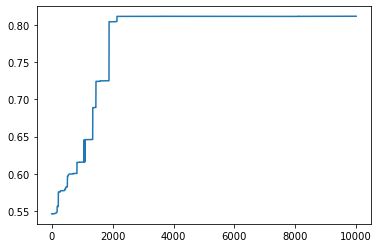

In [26]:
import matplotlib.pyplot as plt

plt.plot(history['val_acc'])

In [ ]:
import pandas as pd
import os.path 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#시각화하기

for i in range(p_num):
    path2 = 'scene3/splash-%d.txt' %i
    path3 = 'scene3/nonsplash-%d.txt' %i
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-0.15,0.15)
    ax.set_ylim(-0.15,0.15)
    ax.set_zlim(-0.15,0.15)
    
    #splash
    if os.stat(path2).st_size!=0:
        data2 = pd.read_csv(path2, header = None)
        data_split = data2[0].str.split(" ")
        data2['px'] = data_split.str.get(0)
        data2['py'] = data_split.str.get(1)
        data2['pz'] = data_split.str.get(2)
        df2 = data2.drop([0], axis = 1)
        df2 = df2.astype({'px' :'float','py' :'float', 'pz' :'float'})
        x = df2['px']
        y = df2['py']
        z = df2['pz']
        ax.scatter(x, z, y, c = 'r', s= 200, alpha=0.7) #red
        
        
    #nonsplash  
    if os.stat(path3).st_size!=0:
        data3 = pd.read_csv(path3, header = None)
        data_split2 = data3[0].str.split(" ")
        data3['px'] = data_split2.str.get(0)
        data3['py'] = data_split2.str.get(1)
        data3['pz'] = data_split2.str.get(2)
        df3 = data3.drop([0], axis = 1)
        df3 = df3.astype({'px' :'float','py' :'float', 'pz' :'float'})
        x2 = df3['px']
        y2 = df3['py']
        z2 = df3['pz']
        ax.scatter(x2, z2, y2, c = 'skyblue', s= 200, alpha=0.5) #blue
        
    plt.title("scatter-%d"%i)
    plt.savefig('scattering_splash-%d.jpg' %i) #이미지 저장하기
    